In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
df = pd.read_csv('../BNB_nue data/big_data_nue_and_mu_scaledVars.csv', index_col=0)
df = df.dropna()
df.head()
len(df)
#len(df[df['isTrueTrack']==0])

20232

In [99]:

variables = ['eps','RSS', 'RSS2', 'pc2Var', 'sliding', 'nHits']


In [100]:
df_cut = df.loc[(df['completeness']>0.5) & (df['purity']>0.5) & (df['nHits']>0) ]
len(df_cut)
df.head()
len(df_cut)

16789

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


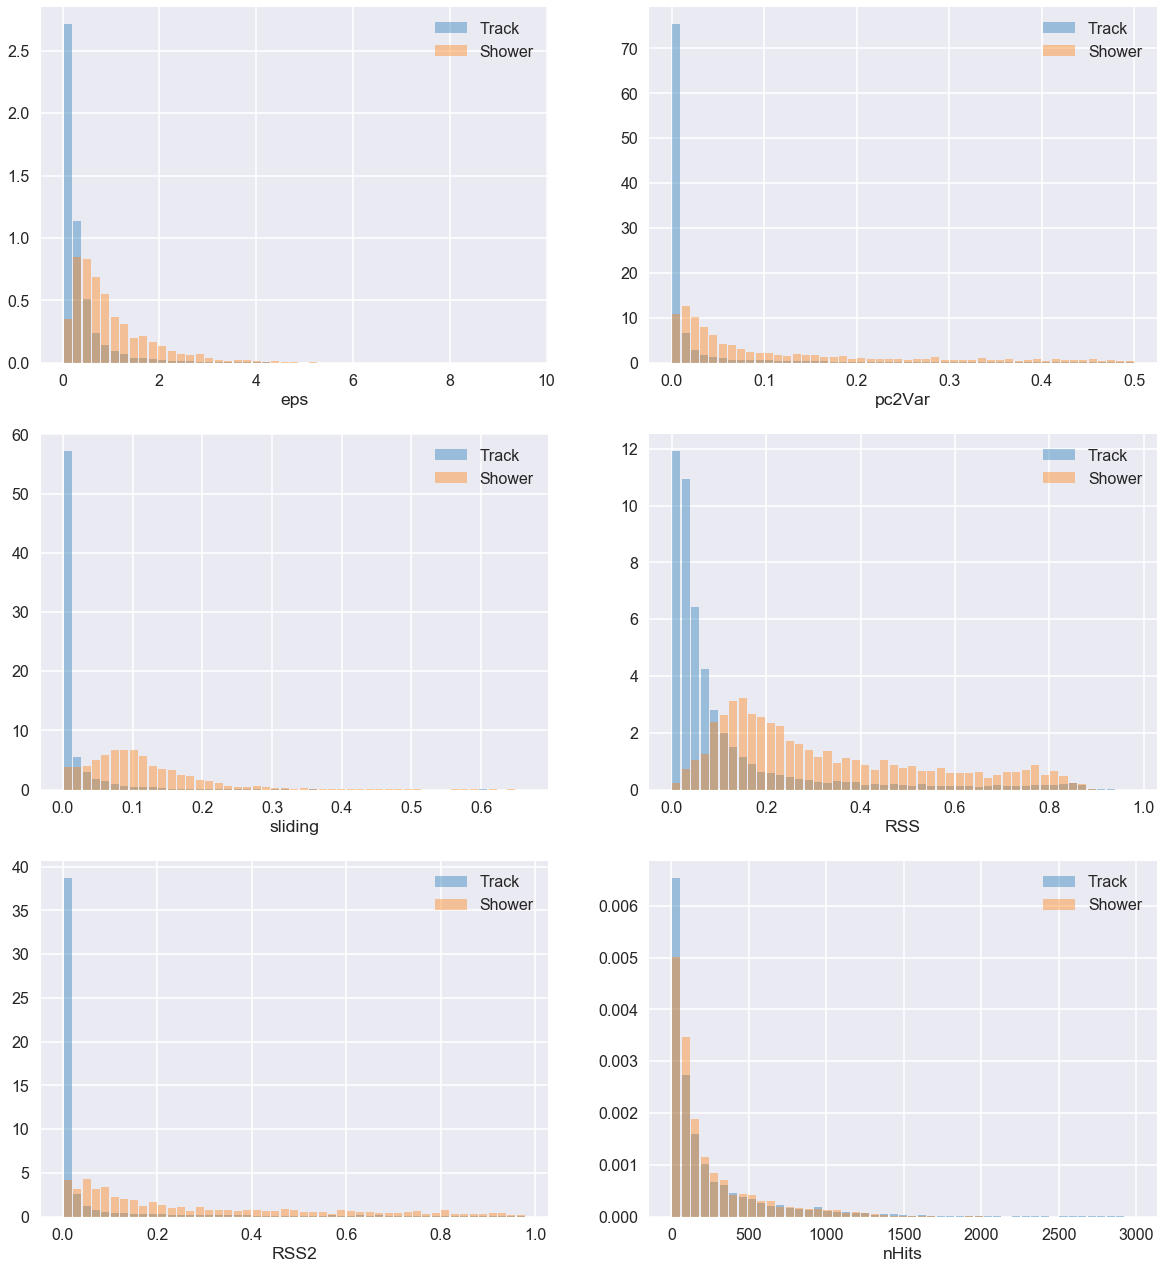

In [101]:
sns.set_style('darkgrid')
sns.set_context("poster")
length=3
width=2
fig, axarr = plt.subplots(length, width, figsize=(20,10))
plt.gcf().subplots_adjust(bottom=-0.8)
count=0
for i in range(len(variables)):
    bins = np.arange(min(df_cut[variables[i]]), max(df_cut[variables[i]]),(max(df_cut[variables[i]]) - min(df_cut[variables[i]]))/50)
    sns.distplot(df_cut[df_cut.isTrueTrack == 1][variables[i]],hist_kws = {"rwidth" :0.85},  bins=bins, label='Track',kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    sns.distplot(df_cut[df_cut.isTrueTrack == 0][variables[i]],hist_kws = {"rwidth" :0.85}, bins= bins, label = 'Shower', kde=False, norm_hist=True, ax=axarr[i%length][count%width])
    plt.legend()
    axarr[i%length][count%width].legend()
    #axarr[i%length][count%width].set_yscale('log')
    #axarr[i%length][count%width].set_xscale('log')
    count+=1
    plt.close()
    #plt.show()
    
fig

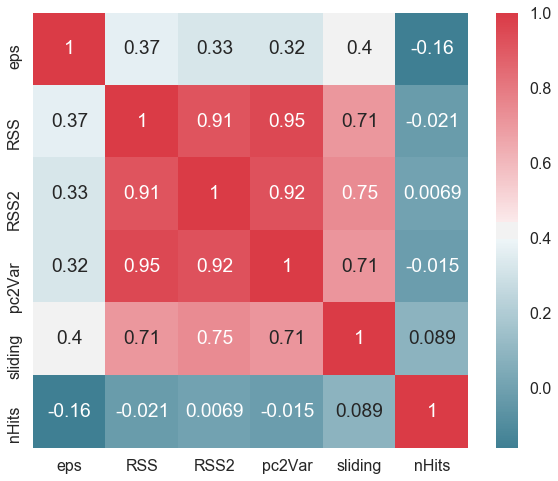

In [102]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_cut[variables].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = corr)
plt.show()

In [103]:
df.head()

,isTrueTrack,pdg,completeness,purity,x,z,length,sliding,eps,pc2Var,nHits,RSS,RSS2,sliding_modified,envelope
0,1,2212,1.000000,0.909091,[ 1.72973108 1.64524386 1.51650143 1.431008...,[-1.69030851 -1.60579308 -1.52127766 -1.436762...,4.785806,0.005515,0.133,0.000208,41,0.015505,0.000631,0.005525,9.579459
1,1,2212,0.733333,1.000000,[-1.47290088 -1.33730089 -1.09586675 -0.834588...,[ -1.60356745e+00 -1.33630621e+00 -1.0690449...,4.449725,0.001786,0.365,0.000672,13,0.027864,0.001706,0.005464,8.916642
2,0,11,0.892892,0.998911,[ 1.64560692e+00 1.63333809e+00 1.6140146...,[ -1.81425037e+00 -1.79745365e+00 -1.7806569...,7.127999,0.157412,1.486,0.039021,247,0.227368,0.149946,0.111450,15.046738
3,1,2212,0.989362,0.965398,[-1.36891817 -1.37278191 -1.37222995 -1.380509...,[-1.59732439 -1.57583289 -1.55434138 -1.532849...,4.540850,0.004279,0.385,0.001711,136,0.051166,0.001112,0.004741,9.154247
4,1,2212,0.875000,0.875000,[-1.39488761 -1.32920905 -1.2717403 -1.159539...,[-1.65144565 -1.48630108 -1.32115652 -1.156011...,4.564701,0.003981,0.229,0.002311,21,0.055676,0.002714,0.004950,9.176259


In [137]:
train_variables = variables + ['nHits']
X_train, X_test, y_train, y_test = train_test_split(df_cut[train_variables], df_cut['isTrueTrack'], test_size=0.5, random_state=42)

In [138]:
#clf=DecisionTreeClassifier(max_depth=6)
clf = GradientBoostingClassifier()
clf = clf.fit(X_train, y_train )
y_pred = clf.predict(X_test)
probabilities = clf.predict_proba(X_test)
prob = [probabilities[i][1] for i in range(len(X_test))]


confusion_matrix(y_test, y_pred), clf.feature_importances_, train_variables, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred)  

(array([[ 984,  320],
        [ 314, 6777]], dtype=int64),
 array([0.19221896, 0.14536631, 0.10634617, 0.10648832, 0.33418262,
        0.06075451, 0.0546431 ]),
 ['eps', 'RSS', 'RSS2', 'pc2Var', 'sliding', 'nHits', 'nHits'],
 0.9244788564621799,
 0.9553143501550607)

In [139]:
X_test['prob']=prob
X_test['pred']=y_pred
X_test['isTrueTrack']=y_test

In [140]:
X_test.head()

,eps,RSS,RSS2,pc2Var,sliding,nHits,nHits,prob,pred,isTrueTrack
3078,0.179,0.032701,0.001256,0.000685,6.746450e-03,37,37,0.987955,1,1
11252,0.720,0.059599,0.009221,0.002384,4.872885e-03,98,98,0.989260,1,1
3383,0.314,0.026497,0.001549,0.000687,2.575988e-17,12,12,0.992691,1,0
5015,0.170,0.011866,0.000324,0.000098,1.782325e-03,321,321,0.995696,1,1
15928,0.936,0.832892,0.904177,0.490505,6.198738e-01,284,284,0.239197,0,0


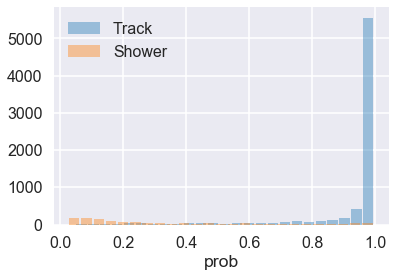

In [141]:
sns.distplot(X_test.loc[X_test['isTrueTrack']==1].prob,hist_kws = {"rwidth" : 0.85}, label='Track', kde=False, bins= 25)
sns.distplot(X_test.loc[X_test['isTrueTrack']==0].prob, label='Shower',hist_kws = {"rwidth" : 0.85}, kde=False, bins= 25)
plt.legend()
plt.show()


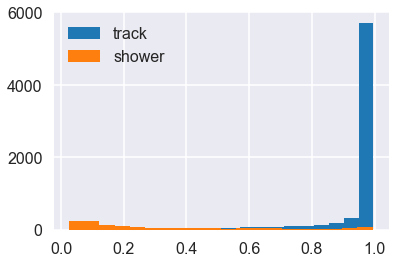

In [142]:
plt.hist(X_test.loc[X_test['isTrueTrack']==1].prob, label='track', bins=20)
plt.hist(X_test.loc[X_test['isTrueTrack']==0].prob, label='shower', bins=20)
plt.legend()

In [145]:
values = np.arange(0,1,0.04)
track_purity=[]
tp_array = []
for value in values:
    tp=0
    fp=0
    for j in X_test.index:
        if X_test.prob[j]>value:
            if X_test.isTrueTrack[j]==1:
                tp+= 1
            else:
                fp+=1
    tp_array.append(tp)
    track_purity.append(tp/(tp+fp))

In [146]:
p= sum(X_test.isTrueTrack)
track_completeness = [i/p for i in tp_array]


In [144]:
''' track_completeness=[]
p= sum(X_test.isTrueTrack)
for value in values:
    tp=0
    fp=0
    for j in X_test.index:
        if X_test.prob[j]>value:
            if X_test.isTrueTrack[j]==1:
                tp+= 1
    track_completeness.append(tp/p)''' 

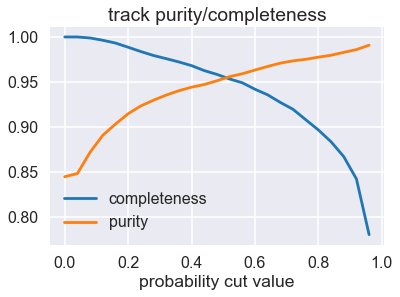

In [147]:
plt.plot(values, track_completeness, label = 'completeness' )
plt.plot(values, track_purity, label = 'purity')
plt.legend(loc = 'best')
plt.title('track purity/completeness')
plt.xlabel('probability cut value')
plt.show()

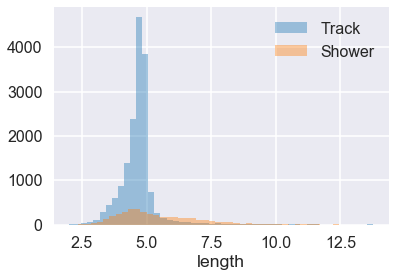

In [95]:

sns.distplot(df[df.isTrueTrack == 1]['length'], kde=False, label='Track')

sns.distplot(df[df.isTrueTrack == 0]['length'], kde=False, label='Shower')
plt.legend()